# Exercise 

## 5.1

### a

In [1]:
using LinearAlgebra
using GLM
using DataFrames
using Gadfly

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1278


In [2]:
T = [24.9, 35.0, 44.9, 55.1, 65.2, 75.2, 85.2, 95.2]
mPa = [1.133, 0.9772, 0.8532, 0.7550, 0.6723, 0.6021, 0.5420, 0.5074]

8-element Array{Float64,1}:
 1.133
 0.9772
 0.8532
 0.755
 0.6723
 0.6021
 0.542
 0.5074

In [4]:
dt = DataFrame(T = T, mPa = mPa)

,T,mPa
,Float64,Float64
1,24.9,1.133
2,35.0,0.9772
3,44.9,0.8532
4,55.1,0.755
5,65.2,0.6723
6,75.2,0.6021
7,85.2,0.542
8,95.2,0.5074


In [5]:
ols = lm(@formula(mPa ~ T), dt)
r2(ols)

0.9601534887322828

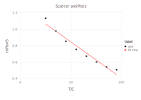

In [6]:
pict = layer(dt, x=dt[:, :T], y=dt[:,:mPa], Geom.point, Theme(default_color="black"))
line = layer(x=dt[:, :T], y= GLM.predict(ols), Geom.line, Theme(default_color="red"))

plot(pict, line, Guide.title("Scatter and Plots"), Guide.xlabel("T/C"), Guide.ylabel("mPa×S"),Guide.manual_color_key("label",["dot","fit line"],
                            ["black","red"]))

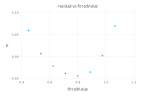

In [7]:
e = dt[:, :mPa] - GLM.predict(ols)
plot(x=GLM.predict(ols),y=e, Geom.point,Guide.xlabel("fittedValue"), Guide.ylabel("E"),Guide.title("residual vs fittedValue"))

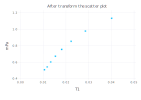

In [8]:
# do x' = 1/x transform
dt.T1 = 1 ./ T
#print(dt)
plot(dt, x=:T1, y=:mPa, Geom.point, Guide.title("After transform the scatter plot"))

In [9]:
ols1 = lm(@formula(mPa ~ T1), dt)
r2(ols1)

0.9644411900933421

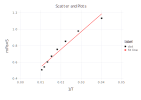

In [10]:
plot(layer(x=dt[:,:T1], y=dt[:, :mPa], Geom.point, Theme(default_color="black")),layer(x=dt[:, :T1], y=GLM.predict(ols1), Geom.line, Theme(default_color="red")),
    Guide.title("Scatter and Plots"), Guide.xlabel("1/T"), Guide.ylabel("mPa×S"),Guide.manual_color_key("label",["dot","fit line"],
                            ["black","red"])
)

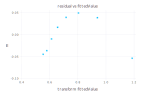

In [11]:
e = dt[:, :mPa] - GLM.predict(ols1)
plot(x=GLM.predict(ols1),y=e, Geom.point,Guide.xlabel("transform fittedValue"), Guide.ylabel("E"),Guide.title("residual vs fittedValue"))

8×2 DataFrame
│ Row │ T2      │ mpa        │
│     │ Float64 │ Float64    │
├─────┼─────────┼────────────┤
│ 1   │ 3.21487 │ 0.124869   │
│ 2   │ 3.55535 │ -0.0230639 │
│ 3   │ 3.80444 │ -0.158761  │
│ 4   │ 4.00915 │ -0.281038  │
│ 5   │ 4.17746 │ -0.397051  │
│ 6   │ 4.32015 │ -0.507332  │
│ 7   │ 4.445   │ -0.612489  │
│ 8   │ 4.55598 │ -0.678456  │

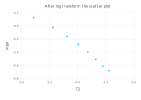

In [12]:
df= DataFrame()
df.T2 = log.(T)
df.mpa = log.(mPa)
print(df)
plot(df, x=:T2, y=:mpa, Geom.point, Guide.title("After log transform the scatter plot"))

In [13]:
ols2 = lm(@formula(mpa ~ T2), df)
print(r2(ols2),'\n')
print(ols2)

0.9882905492525584
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

mpa ~ 1 + T2

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   2.14381    0.10997     19.49     <1e-5   1.87472    2.4129
T2           -0.613539   0.0272642  -22.50     <1e-6  -0.680253  -0.546826
──────────────────────────────────────────────────────────────────────────

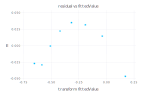

In [14]:
e = df[:, :mpa] - GLM.predict(ols2)
plot(x=GLM.predict(ols2),y=e, Geom.point,Guide.xlabel("transform fittedValue"), Guide.ylabel("E"),Guide.title("residual vs fittedValue"))

So the better fit:
$y' = ln(2.14381)-0.613539\times x'$

***

****

## 5.2

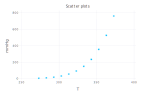

In [15]:
T = [273, 283, 293, 303, 313, 323, 333, 343, 353, 363, 373]
mmHg = [4.6, 9.2, 17.5, 31.8, 55.3, 92.5, 149.4, 233.7, 355.1, 525.8, 760.0]
dt = DataFrame(T=T, mmHg=mmHg)
plot(dt, x=:T, y=:mmHg, Geom.point, Guide.title("Scatter plots"))

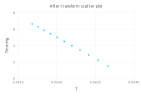

In [16]:
# do some transformation 
#y'=lny
#x' = 1/x
df = DataFrame()
df.T = 1 ./dt.T
df.TmmHg = log.(dt.mmHg)
plot(df, x=:T, y=:TmmHg, Guide.title("After transform scatter plot"))

In [17]:
ols = lm(@formula(TmmHg ~ T), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

TmmHg ~ 1 + T

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error        t  Pr(>|t|)   Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)     20.6074   0.0632535   325.79    <1e-18     20.4643     20.7505
T            -5200.76    20.1351     -258.29    <1e-18  -5246.31    -5155.21
──────────────────────────────────────────────────────────────────────────────

In [18]:
# R²
r2(ols)

0.999865116948342

So the better result:

$ln(mmHg) = -5200.76 \times \frac 1T + 20.6074$

******

***

## 5.3

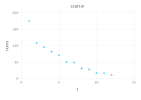

In [19]:
#numbers
nums = [175, 108, 95, 82, 71, 50, 49, 31, 28, 17, 16, 11]
#times
t = [1,2,3,4,5,6,7,8,9,10,11,12]
dt = DataFrame(t=t, nums=nums)
plot(dt, x=:t, y=:nums, Guide.title("scatter"))

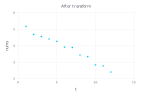

In [20]:
#do y'=lny
df = DataFrame()
df.t = dt.t
df.nums = log.(dt.nums)
plot(df, x=:t, y=:nums, Guide.title("After transform"))

In [21]:
ols = lm(@formula(nums ~ t), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

nums ~ 1 + t

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   5.33878    0.0740941   72.05    <1e-14   5.17369     5.50387
t            -0.236172   0.0100674  -23.46    <1e-9   -0.258604   -0.21374
──────────────────────────────────────────────────────────────────────────

In [22]:
r2(ols)

0.982153305740796

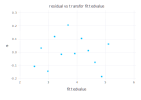

In [23]:
e = df.nums - GLM.predict(ols)
plot(x=GLM.predict(ols), y=e, Guide.title("residual vs transfor fittedvalue"), Guide.xlabel("fittedvalue"), Guide.ylabel("e"))

So the better fitted model is :

$ln(nums) = 5.33878-0.236172 \cdot t$

***

***

## 5.5

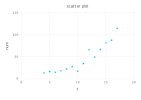

In [24]:
# weeks since last repair
t = [4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# average number of defective bottles
num = [13.0, 16.1, 14.5, 17.8, 22.0, 27.4, 16.8, 34.2, 65.6, 49.2, 66.2, 81.2, 87.4, 114.5]
dt = DataFrame(t=t, num=num)
plot(dt, x=:t, y=:num, Guide.title("scatter plot"))

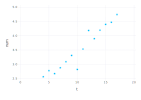

In [25]:
# do transform
df = DataFrame()
df.t = dt.t
df.num = log.(dt.num)
plot(df,x=:t, y=:num)

In [26]:
ols = lm(@formula(num ~ t), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

num ~ 1 + t

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  1.71622    0.173115    9.91     <1e-6    1.33904   2.09341
t            0.173506   0.0153918  11.27     <1e-7    0.13997   0.207041
────────────────────────────────────────────────────────────────────────

In [27]:
r2(ols)

0.913713493598036

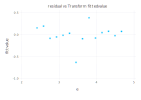

In [28]:
e = df.num - GLM.predict(ols)
plot(x=GLM.predict(ols), y=e, Guide.title("residual vs Transform fittedvalue"), Guide.xlabel("e"), Guide.ylabel("fittvalue"))

So the better model:

$ln(num) = 0.173506 \cdot t + 1.71622$

***

***

## 5.6

a

think a bout B-18 table data,ignore $x_1$

In [29]:
pwd()

"/Users/zhouzhuofei/wen/math/Linear Regression"

no data table can be find in data zip, maybe i download error

In [30]:
cd("/Users/zhouzhuofei/wen/assets/linear_regression_5e_data_sets/Appendices")

In [31]:
pwd()

"/Users/zhouzhuofei/wen/assets/linear_regression_5e_data_sets/Appendices"

In [77]:
using ExcelReaders
using XLSX

┌ Info: Precompiling XLSX [fdbf4ff8-1666-58a4-91e7-1b58723a45e0]
└ @ Base loading.jl:1278


In [86]:
data = readxlsheet("data-table-B18.xls", "Sheet1")
dt = DataFrame()


""
""


In [67]:

for i in 1:size(data)[2]
    name = data[1,:][i]
    df = data[2:size(data)[1], i]
    #print(name)
    dt.name = [j for j in df]
    print(df)
end

Any[343.0, 356.0, 344.0, 356.0, 352.0, 361.0, 372.0, 355.0, 375.0, 359.0, 364.0, 357.0, 368.0, 360.0, 372.0, 352.0]Any[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]Any[52.8, 52.8, 50.0, 50.0, 47.2, 47.2, 47.0, 47.0, 48.3, 48.3, 44.7, 44.7, 55.7, 55.7, 52.8, 52.8]Any[811.7, 811.7, 821.3, 821.3, 832.0, 832.0, 831.3, 831.3, 836.8, 836.8, 808.3, 808.3, 808.7, 808.7, 813.2, 813.2]Any[2.11, 2.11, 2.11, 2.11, 2.09, 2.09, 2.26, 2.26, 2.47, 2.47, 1.41, 1.41, 1.44, 1.44, 1.96, 1.96]Any[220.0, 220.0, 223.0, 223.0, 221.0, 221.0, 190.0, 190.0, 180.0, 180.0, 180.0, 180.0, 176.0, 176.0, 175.0, 175.0]Any[261.0, 261.0, 260.0, 260.0, 261.0, 261.0, 323.0, 323.0, 364.0, 364.0, 300.0, 300.0, 299.0, 299.0, 301.0, 301.0]Any[87.0, 87.0, 87.0, 87.0, 92.0, 92.0, 75.0, 75.0, 71.0, 71.0, 64.0, 64.0, 64.0, 64.0, 75.0, 75.0]Any[1.8, 1.8, 16.6, 16.6, 23.0, 23.0, 25.1, 25.1, 26.1, 26.1, 20.0, 20.0, 20.5, 20.5, 17.3, 17.3]